<a href="https://colab.research.google.com/github/Reventh-Sharma/Active-Learning-/blob/master/Active_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install modAL 

In [ ]:
import numpy as np
import pandas as pd
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
from modAL.uncertainty import entropy_sampling
from modAL.uncertainty import entropy_sampling
from modAL.uncertainty import classifier_uncertainty
from modAL.uncertainty import classifier_margin
from modAL.uncertainty import classifier_entropy
from modAL.models import ActiveLearner, Committee
from modAL.disagreement import vote_entropy_sampling
from modAL.disagreement import vote_entropy
from modAL.disagreement import KL_max_disagreement
from modAL.disagreement import max_disagreement_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy import stats 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from copy import deepcopy

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Assignments/ML/datacsv/seed_dataset.csv", header=None) ##Please provide required file name here
print(data[data.isnull().any(axis=1)])
data = data.sample(frac=1, random_state=11)
#Random sampling to distribute data 
data_labels = data.iloc[:,7].astype('category', copy=True)  #data_labels is 7th column are extracted
data = data.iloc[:,:-1]
data = (data-data.mean(axis=0))/data.std(axis=0)

data, data_labels = np.array(data.iloc[:,:]), np.array(data_labels.iloc[:])
train_len = int(data.shape[0]*0.1)
X_train, y_train = data[0:train_len,:], data_labels[0:train_len]
X_unlabld, y_oracles = data[train_len:,:], data_labels[train_len:]
oracles_len = np.array([data.shape[0]*0.1, data.shape[0]*0.2, data.shape[0]*0.3, data.shape[0]*0.4], dtype=int)
print("Data for human oracle additional labelling has lengths:", oracles_len[0],',', oracles_len[1],',', 
          oracles_len[2],'and', oracles_len[3], 'for 10%, 20%, 30% and 40% labelling respectively')

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7]
Index: []
Data for human oracle additional labelling has lengths: 21 , 42 , 63 and 84 for 10%, 20%, 30% and 40% labelling respectively


Initial prediction accuracy using least confident: 0.8571428571428571
Accuracy after query: 111 is 0.8829787234042553 for iter: 0
Accuracy after query: 3 is 0.8716577540106952 for iter: 1
Accuracy after query: 34 is 0.8870967741935484 for iter: 2
Accuracy after query: 183 is 0.8918918918918919 for iter: 3
Accuracy after query: 144 is 0.8858695652173914 for iter: 4
Accuracy after query: 138 is 0.8852459016393442 for iter: 5
Accuracy after query: 36 is 0.8791208791208791 for iter: 6
Accuracy after query: 142 is 0.8729281767955801 for iter: 7
Accuracy after query: 63 is 0.8722222222222222 for iter: 8
Accuracy after query: 162 is 0.88268156424581 for iter: 9
Accuracy after query: 157 is 0.8932584269662921 for iter: 10
Accuracy after query: 107 is 0.8870056497175142 for iter: 11
Accuracy after query: 68 is 0.8806818181818182 for iter: 12
Accuracy after query: 125 is 0.9028571428571428 for iter: 13
Accuracy after query: 144 is 0.8908045977011494 for iter: 14
Accuracy after query: 154 is 0.90

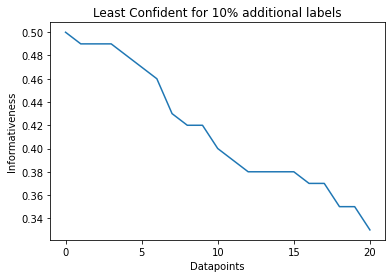

Accuracy after query: 111 is 0.925531914893617 for iter: 0
Accuracy after query: 3 is 0.9251336898395722 for iter: 1
Accuracy after query: 34 is 0.9301075268817204 for iter: 2
Accuracy after query: 183 is 0.9243243243243243 for iter: 3
Accuracy after query: 144 is 0.9184782608695652 for iter: 4
Accuracy after query: 138 is 0.9234972677595629 for iter: 5
Accuracy after query: 36 is 0.9285714285714286 for iter: 6
Accuracy after query: 142 is 0.9171270718232044 for iter: 7
Accuracy after query: 63 is 0.9222222222222223 for iter: 8
Accuracy after query: 162 is 0.9217877094972067 for iter: 9
Accuracy after query: 157 is 0.9213483146067416 for iter: 10
Accuracy after query: 107 is 0.9209039548022598 for iter: 11
Accuracy after query: 68 is 0.9147727272727273 for iter: 12
Accuracy after query: 125 is 0.9142857142857143 for iter: 13
Accuracy after query: 144 is 0.9252873563218391 for iter: 14
Accuracy after query: 154 is 0.9248554913294798 for iter: 15
Accuracy after query: 22 is 0.92441860465

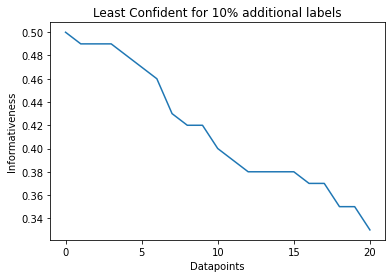

Accuracy after query: 111 is 0.925531914893617 for iter: 0
Accuracy after query: 3 is 0.9251336898395722 for iter: 1
Accuracy after query: 34 is 0.9301075268817204 for iter: 2
Accuracy after query: 183 is 0.9243243243243243 for iter: 3
Accuracy after query: 144 is 0.9239130434782609 for iter: 4
Accuracy after query: 138 is 0.9289617486338798 for iter: 5
Accuracy after query: 36 is 0.9285714285714286 for iter: 6
Accuracy after query: 142 is 0.9281767955801105 for iter: 7
Accuracy after query: 63 is 0.9277777777777778 for iter: 8
Accuracy after query: 162 is 0.9273743016759777 for iter: 9
Accuracy after query: 157 is 0.9269662921348315 for iter: 10
Accuracy after query: 107 is 0.9265536723163842 for iter: 11
Accuracy after query: 68 is 0.9261363636363636 for iter: 12
Accuracy after query: 125 is 0.9257142857142857 for iter: 13
Accuracy after query: 144 is 0.9252873563218391 for iter: 14
Accuracy after query: 154 is 0.9248554913294798 for iter: 15
Accuracy after query: 22 is 0.92441860465

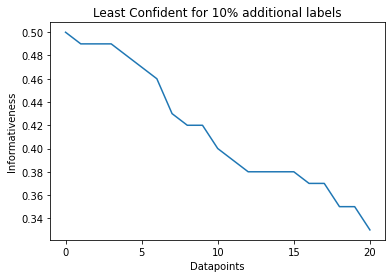

Accuracy after query: 111 is 0.9308510638297872 for iter: 0
Accuracy after query: 3 is 0.93048128342246 for iter: 1
Accuracy after query: 34 is 0.9301075268817204 for iter: 2
Accuracy after query: 183 is 0.9351351351351351 for iter: 3
Accuracy after query: 144 is 0.9293478260869565 for iter: 4
Accuracy after query: 138 is 0.9289617486338798 for iter: 5
Accuracy after query: 36 is 0.9340659340659341 for iter: 6
Accuracy after query: 142 is 0.9337016574585635 for iter: 7
Accuracy after query: 63 is 0.9222222222222223 for iter: 8
Accuracy after query: 162 is 0.9217877094972067 for iter: 9
Accuracy after query: 157 is 0.9269662921348315 for iter: 10
Accuracy after query: 107 is 0.9378531073446328 for iter: 11
Accuracy after query: 68 is 0.9204545454545454 for iter: 12
Accuracy after query: 125 is 0.9257142857142857 for iter: 13
Accuracy after query: 144 is 0.9252873563218391 for iter: 14
Accuracy after query: 154 is 0.9248554913294798 for iter: 15
Accuracy after query: 22 is 0.924418604651

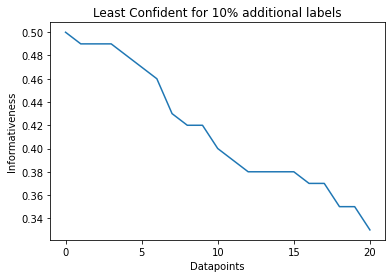

Initial prediction accuracy using least confident: 0.8783068783068783
Accuracy after query: 30 is 0.8563829787234043 for iter: 0
Accuracy after query: 40 is 0.8502673796791443 for iter: 1
Accuracy after query: 90 is 0.8494623655913979 for iter: 2
Accuracy after query: 98 is 0.8540540540540541 for iter: 3
Accuracy after query: 122 is 0.8532608695652174 for iter: 4
Accuracy after query: 134 is 0.8524590163934426 for iter: 5
Accuracy after query: 136 is 0.8461538461538461 for iter: 6
Accuracy after query: 137 is 0.850828729281768 for iter: 7
Accuracy after query: 144 is 0.85 for iter: 8
Accuracy after query: 152 is 0.8491620111731844 for iter: 9
Accuracy after query: 172 is 0.8595505617977528 for iter: 10
Accuracy after query: 29 is 0.847457627118644 for iter: 11
Accuracy after query: 42 is 0.8465909090909091 for iter: 12
Accuracy after query: 51 is 0.8457142857142858 for iter: 13
Accuracy after query: 73 is 0.8448275862068966 for iter: 14
Accuracy after query: 87 is 0.838150289017341 for

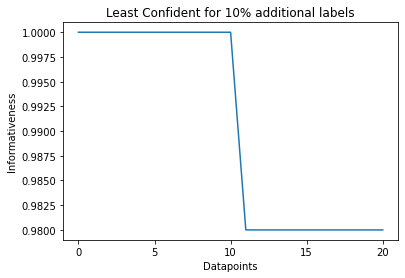

Accuracy after query: 30 is 0.8563829787234043 for iter: 0
Accuracy after query: 40 is 0.8502673796791443 for iter: 1
Accuracy after query: 90 is 0.8548387096774194 for iter: 2
Accuracy after query: 98 is 0.8540540540540541 for iter: 3
Accuracy after query: 122 is 0.8478260869565217 for iter: 4
Accuracy after query: 134 is 0.8524590163934426 for iter: 5
Accuracy after query: 136 is 0.8516483516483516 for iter: 6
Accuracy after query: 137 is 0.8453038674033149 for iter: 7
Accuracy after query: 144 is 0.85 for iter: 8
Accuracy after query: 152 is 0.8491620111731844 for iter: 9
Accuracy after query: 172 is 0.8426966292134831 for iter: 10
Accuracy after query: 29 is 0.847457627118644 for iter: 11
Accuracy after query: 42 is 0.8522727272727273 for iter: 12
Accuracy after query: 51 is 0.84 for iter: 13
Accuracy after query: 73 is 0.8333333333333334 for iter: 14
Accuracy after query: 87 is 0.8323699421965318 for iter: 15
Accuracy after query: 88 is 0.8430232558139535 for iter: 16
Accuracy aft

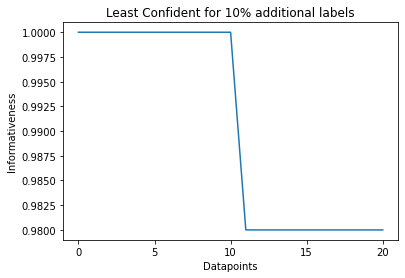

Accuracy after query: 30 is 0.8617021276595744 for iter: 0
Accuracy after query: 40 is 0.8556149732620321 for iter: 1
Accuracy after query: 90 is 0.8602150537634409 for iter: 2
Accuracy after query: 98 is 0.8540540540540541 for iter: 3
Accuracy after query: 122 is 0.8532608695652174 for iter: 4
Accuracy after query: 134 is 0.8415300546448088 for iter: 5
Accuracy after query: 136 is 0.8516483516483516 for iter: 6
Accuracy after query: 137 is 0.850828729281768 for iter: 7
Accuracy after query: 144 is 0.85 for iter: 8
Accuracy after query: 152 is 0.8491620111731844 for iter: 9
Accuracy after query: 172 is 0.848314606741573 for iter: 10
Accuracy after query: 29 is 0.8531073446327684 for iter: 11
Accuracy after query: 42 is 0.8465909090909091 for iter: 12
Accuracy after query: 51 is 0.84 for iter: 13
Accuracy after query: 73 is 0.8563218390804598 for iter: 14
Accuracy after query: 87 is 0.8323699421965318 for iter: 15
Accuracy after query: 88 is 0.8430232558139535 for iter: 16
Accuracy afte

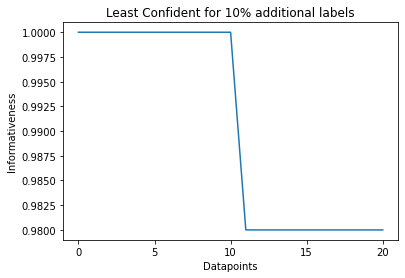

Accuracy after query: 30 is 0.8670212765957447 for iter: 0
Accuracy after query: 40 is 0.8556149732620321 for iter: 1
Accuracy after query: 90 is 0.8655913978494624 for iter: 2
Accuracy after query: 98 is 0.8540540540540541 for iter: 3
Accuracy after query: 122 is 0.8478260869565217 for iter: 4
Accuracy after query: 134 is 0.8579234972677595 for iter: 5
Accuracy after query: 136 is 0.8461538461538461 for iter: 6
Accuracy after query: 137 is 0.850828729281768 for iter: 7
Accuracy after query: 144 is 0.8444444444444444 for iter: 8
Accuracy after query: 152 is 0.8435754189944135 for iter: 9
Accuracy after query: 172 is 0.8651685393258427 for iter: 10
Accuracy after query: 29 is 0.847457627118644 for iter: 11
Accuracy after query: 42 is 0.8522727272727273 for iter: 12
Accuracy after query: 51 is 0.8514285714285714 for iter: 13
Accuracy after query: 73 is 0.8390804597701149 for iter: 14
Accuracy after query: 87 is 0.838150289017341 for iter: 15
Accuracy after query: 88 is 0.8546511627906976

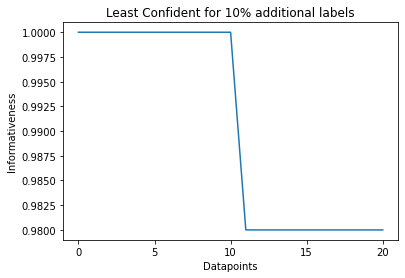

Initial prediction accuracy using least confident: 0.8571428571428571
Accuracy after query: 111 is 0.8723404255319149 for iter: 0
Accuracy after query: 147 is 0.893048128342246 for iter: 1
Accuracy after query: 140 is 0.8978494623655914 for iter: 2
Accuracy after query: 164 is 0.8918918918918919 for iter: 3
Accuracy after query: 162 is 0.9021739130434783 for iter: 4
Accuracy after query: 72 is 0.8961748633879781 for iter: 5
Accuracy after query: 59 is 0.9010989010989011 for iter: 6
Accuracy after query: 179 is 0.9005524861878453 for iter: 7
Accuracy after query: 129 is 0.9 for iter: 8
Accuracy after query: 138 is 0.8994413407821229 for iter: 9
Accuracy after query: 40 is 0.9101123595505618 for iter: 10
Accuracy after query: 64 is 0.903954802259887 for iter: 11
Accuracy after query: 96 is 0.9034090909090909 for iter: 12
Accuracy after query: 145 is 0.9028571428571428 for iter: 13
Accuracy after query: 35 is 0.9137931034482759 for iter: 14
Accuracy after query: 45 is 0.9075144508670521 f

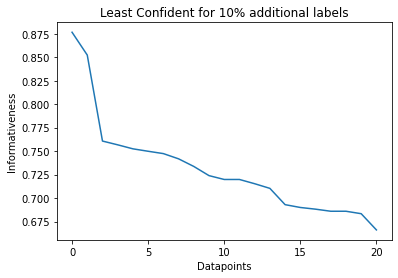

Accuracy after query: 111 is 0.925531914893617 for iter: 0
Accuracy after query: 147 is 0.9251336898395722 for iter: 1
Accuracy after query: 140 is 0.9139784946236559 for iter: 2
Accuracy after query: 164 is 0.9243243243243243 for iter: 3
Accuracy after query: 162 is 0.9239130434782609 for iter: 4
Accuracy after query: 72 is 0.9180327868852459 for iter: 5
Accuracy after query: 59 is 0.9230769230769231 for iter: 6
Accuracy after query: 179 is 0.9171270718232044 for iter: 7
Accuracy after query: 129 is 0.9222222222222223 for iter: 8
Accuracy after query: 138 is 0.9217877094972067 for iter: 9
Accuracy after query: 40 is 0.9213483146067416 for iter: 10
Accuracy after query: 64 is 0.9209039548022598 for iter: 11
Accuracy after query: 96 is 0.9261363636363636 for iter: 12
Accuracy after query: 145 is 0.92 for iter: 13
Accuracy after query: 35 is 0.9310344827586207 for iter: 14
Accuracy after query: 45 is 0.9132947976878613 for iter: 15
Accuracy after query: 3 is 0.9302325581395349 for iter: 

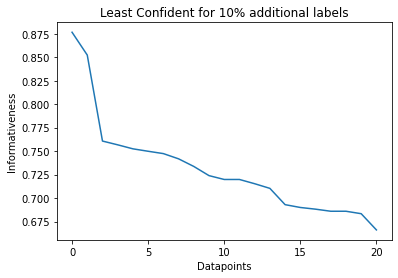

Accuracy after query: 111 is 0.9308510638297872 for iter: 0
Accuracy after query: 147 is 0.9251336898395722 for iter: 1
Accuracy after query: 140 is 0.9193548387096774 for iter: 2
Accuracy after query: 164 is 0.9351351351351351 for iter: 3
Accuracy after query: 162 is 0.9239130434782609 for iter: 4
Accuracy after query: 72 is 0.9234972677595629 for iter: 5
Accuracy after query: 59 is 0.9230769230769231 for iter: 6
Accuracy after query: 179 is 0.9226519337016574 for iter: 7
Accuracy after query: 129 is 0.9277777777777778 for iter: 8
Accuracy after query: 138 is 0.9273743016759777 for iter: 9
Accuracy after query: 40 is 0.9213483146067416 for iter: 10
Accuracy after query: 64 is 0.943502824858757 for iter: 11
Accuracy after query: 96 is 0.9261363636363636 for iter: 12
Accuracy after query: 145 is 0.9257142857142857 for iter: 13
Accuracy after query: 35 is 0.9252873563218391 for iter: 14
Accuracy after query: 45 is 0.930635838150289 for iter: 15
Accuracy after query: 3 is 0.92441860465116

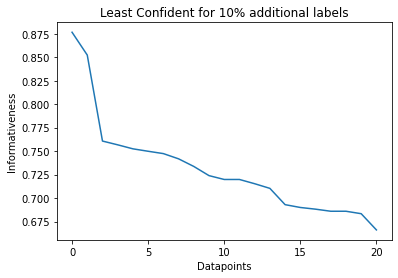

Accuracy after query: 111 is 0.925531914893617 for iter: 0
Accuracy after query: 147 is 0.9358288770053476 for iter: 1
Accuracy after query: 140 is 0.9354838709677419 for iter: 2
Accuracy after query: 164 is 0.9297297297297298 for iter: 3
Accuracy after query: 162 is 0.9293478260869565 for iter: 4
Accuracy after query: 72 is 0.9398907103825137 for iter: 5
Accuracy after query: 59 is 0.9285714285714286 for iter: 6
Accuracy after query: 179 is 0.9337016574585635 for iter: 7
Accuracy after query: 129 is 0.9277777777777778 for iter: 8
Accuracy after query: 138 is 0.9497206703910615 for iter: 9
Accuracy after query: 40 is 0.9269662921348315 for iter: 10
Accuracy after query: 64 is 0.9378531073446328 for iter: 11
Accuracy after query: 96 is 0.9318181818181818 for iter: 12
Accuracy after query: 145 is 0.9314285714285714 for iter: 13
Accuracy after query: 35 is 0.9195402298850575 for iter: 14
Accuracy after query: 45 is 0.9421965317919075 for iter: 15
Accuracy after query: 3 is 0.9302325581395

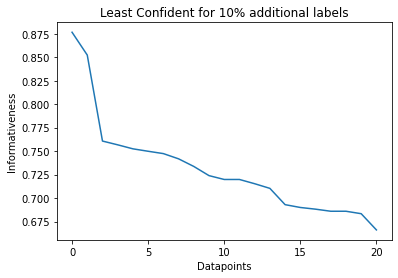

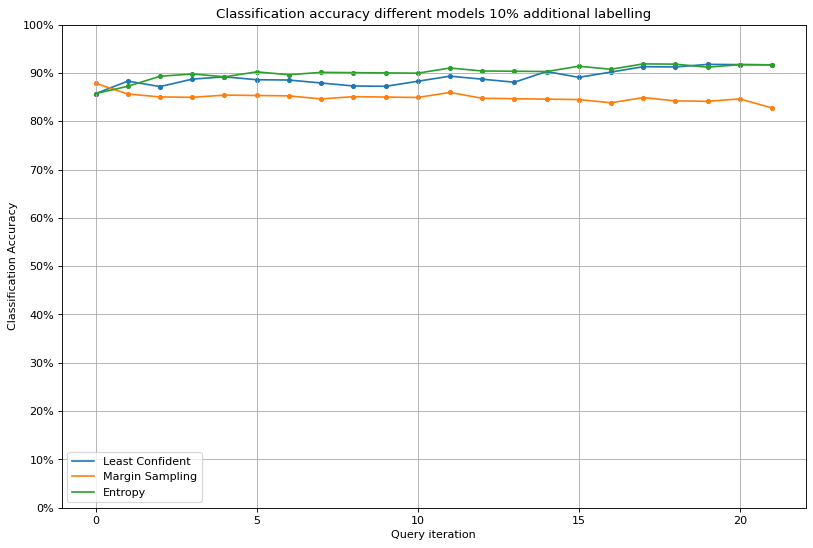

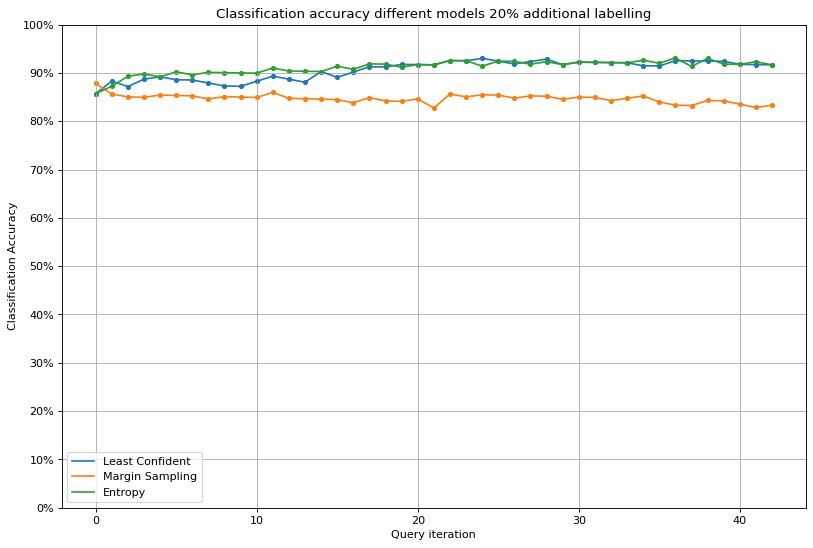

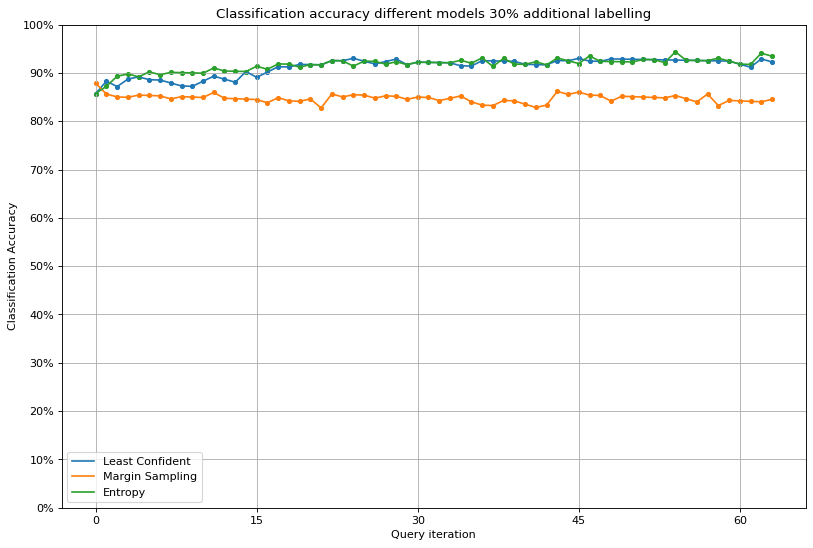

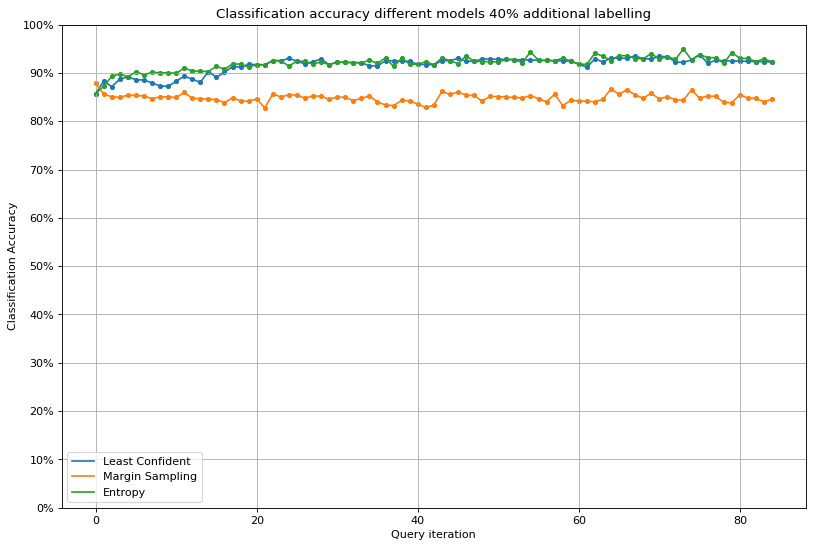

In [ ]:
def LCP(ls, oracles_len, X_unlabld, y_oracles, _learner, values, dicti, j):
    performance= deepcopy(ls)
    for i in range(oracles_len[0]):
        idx = np.argmax(values)
        X, y = X_unlabld[idx,:].reshape(1, -1), y_oracles[idx].reshape(1,)
        info = values[idx]
        _learner.teach(X=X, y=y)
        X_unlabld, y_oracles, values = np.delete(X_unlabld, idx, axis=0), np.delete(y_oracles, idx, axis=0), np.delete(values, idx, axis=0)
        model_accuracy = _learner.score(X_unlabld, y_oracles)
        print('Accuracy after query:',idx, 'is', model_accuracy, 'for iter:', i)
        performance.append(model_accuracy)
        dict1 = {i:info}
        dicti.update(dict1)
    sort_dict = sorted(dicti.items(), key=lambda x: x[1], reverse=True)
    import collections
    dict_1 = collections.OrderedDict(sort_dict)
    from matplotlib.pyplot import figure
    fig, ax = plt.subplots()
    ax.plot(list(dict_1.values()))
    ax.set_xlabel("Datapoints")
    ax.set_ylabel("Informativeness")
    ax.set_title("Least Confident for "+str(10)+"%"+" additional labels")
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10)) 
    plt.show() 
    return performance

def poolbased_Learner(X_train, y_train, X_unlabld, y_oracles, oracles_len, strategy):
    classifier = RandomForestClassifier()
    _learner = ActiveLearner(estimator=classifier, 
                                           query_strategy=strategy, 
                                           X_training=X_train, y_training=y_train)
    initial_acc = _learner.score(X_unlabld, y_oracles)
    print('Initial prediction accuracy using least confident:', initial_acc)
    values = _learner.query(X_unlabld)
    dicti = {}
    performance10 = LCP([initial_acc], oracles_len, X_unlabld, y_oracles, _learner, values, dicti, 10)
    performance20 = LCP(performance10, oracles_len, X_unlabld, y_oracles, _learner, values, dicti, 20)
    performance30 = LCP(performance20, oracles_len, X_unlabld, y_oracles, _learner, values, dicti, 30)
    performance40 = LCP(performance30, oracles_len, X_unlabld, y_oracles, _learner, values, dicti, 40)
    return performance10, performance20, performance30, performance40

def plotComparison(least_confident, margin, entropy, i):
    fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
    ax.plot(least_confident, label = "Least Confident")
    ax.plot(margin, label = "Margin Sampling")
    ax.plot(entropy, label = "Entropy")
    ax.scatter(range(len(least_confident)), least_confident, s=13)
    ax.scatter(range(len(margin)), margin, s=13)
    ax.scatter(range(len(entropy)), entropy, s=13)
    leg = ax.legend()
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
    ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
    ax.set_ylim(bottom=0, top=1)
    ax.grid(True)
    ax.set_title("Classification accuracy different models "+str(i)+"%"+" additional labelling")
    ax.set_xlabel('Query iteration')
    ax.set_ylabel('Classification Accuracy')
    plt.show()

Least_Confident_performance10, Least_Confident_performance20, Least_Confident_performance30, Least_Confident_performance40 = poolbased_Learner(X_train, y_train, X_unlabld, y_oracles, oracles_len, classifier_uncertainty)
X_unlabld, y_oracles = data[train_len:,:], data_labels[train_len:]
margin_performance10, margin_performance20, margin_performance30, margin_performance40 = poolbased_Learner(X_train, y_train, X_unlabld, y_oracles, oracles_len, classifier_margin)
X_unlabld, y_oracles = data[train_len:,:], data_labels[train_len:]
entropy_performance10, entropy_performance20, entropy_performance30, entropy_performance40 = poolbased_Learner(X_train, y_train, X_unlabld, y_oracles, oracles_len, classifier_entropy)
plotComparison(Least_Confident_performance10, margin_performance10, entropy_performance10, 10)
plotComparison(Least_Confident_performance20, margin_performance20, entropy_performance20, 20)
plotComparison(Least_Confident_performance30, margin_performance30, entropy_performance30, 30)
plotComparison(Least_Confident_performance40, margin_performance40, entropy_performance40, 40)

Initial prediction accuracy using margin: 0.8571428571428571
Accuracy after query 136 0.8617021276595744
Accuracy after query 104 0.8556149732620321
Accuracy after query 95 0.8548387096774194
Accuracy after query 161 0.8540540540540541
Accuracy after query 22 0.8532608695652174
Accuracy after query 21 0.8633879781420765
Accuracy after query 120 0.8351648351648352
Accuracy after query 147 0.8674033149171271
Accuracy after query 19 0.8666666666666667
Accuracy after query 158 0.8603351955307262
Accuracy after query 34 0.8651685393258427
Accuracy after query 90 0.8587570621468926
Accuracy after query 161 0.8522727272727273
Accuracy after query 57 0.8971428571428571
Accuracy after query 131 0.896551724137931
Accuracy after query 18 0.884393063583815
Accuracy after query 117 0.8953488372093024
Accuracy after query 43 0.8888888888888888
Accuracy after query 14 0.888235294117647
Accuracy after query 107 0.893491124260355
Accuracy after query 98 0.8928571428571429
Accuracy after stream based qu

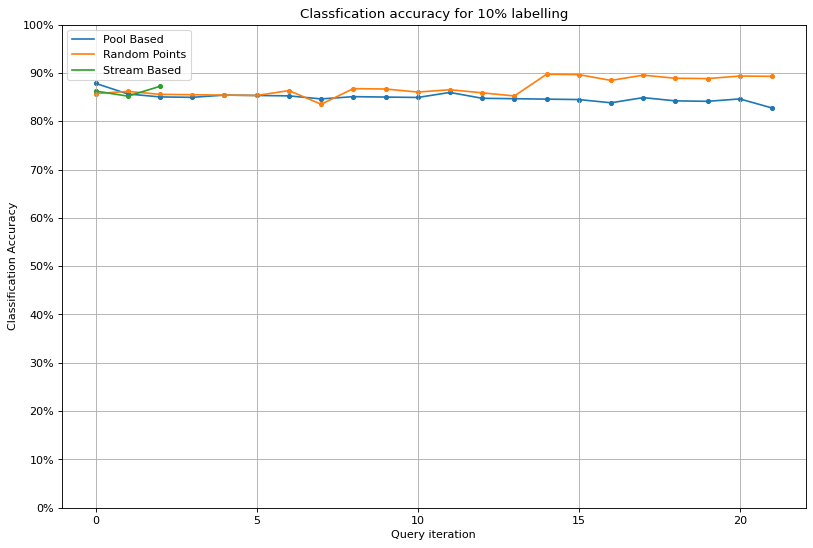

Initial prediction accuracy using margin: 0.873015873015873
Accuracy after query 173 0.8617021276595744
Accuracy after query 92 0.8609625668449198
Accuracy after query 15 0.8548387096774194
Accuracy after query 64 0.8486486486486486
Accuracy after query 151 0.842391304347826
Accuracy after query 181 0.8415300546448088
Accuracy after query 117 0.8681318681318682
Accuracy after query 12 0.850828729281768
Accuracy after query 102 0.8611111111111112
Accuracy after query 107 0.8435754189944135
Accuracy after query 74 0.848314606741573
Accuracy after query 138 0.8531073446327684
Accuracy after query 5 0.8693181818181818
Accuracy after query 120 0.8571428571428571
Accuracy after query 71 0.8563218390804598
Accuracy after query 125 0.861271676300578
Accuracy after query 28 0.8662790697674418
Accuracy after query 133 0.8713450292397661
Accuracy after query 148 0.8647058823529412
Accuracy after query 78 0.863905325443787
Accuracy after query 114 0.8690476190476191
Accuracy after query 72 0.88023

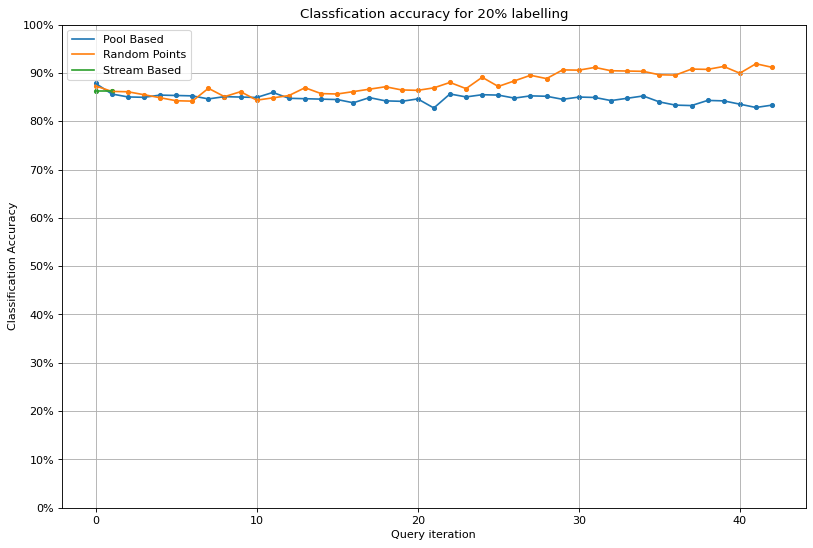

Initial prediction accuracy using margin: 0.8465608465608465
Accuracy after query 174 0.851063829787234
Accuracy after query 125 0.8556149732620321
Accuracy after query 153 0.8548387096774194
Accuracy after query 93 0.8540540540540541
Accuracy after query 28 0.8478260869565217
Accuracy after query 125 0.8524590163934426
Accuracy after query 138 0.8406593406593407
Accuracy after query 14 0.850828729281768
Accuracy after query 148 0.8444444444444444
Accuracy after query 8 0.8435754189944135
Accuracy after query 62 0.8426966292134831
Accuracy after query 121 0.8587570621468926
Accuracy after query 112 0.8465909090909091
Accuracy after query 1 0.8628571428571429
Accuracy after query 11 0.8448275862068966
Accuracy after query 112 0.8497109826589595
Accuracy after query 104 0.877906976744186
Accuracy after query 127 0.8771929824561403
Accuracy after query 17 0.8823529411764706
Accuracy after query 80 0.8698224852071006
Accuracy after query 156 0.8690476190476191
Accuracy after query 92 0.856

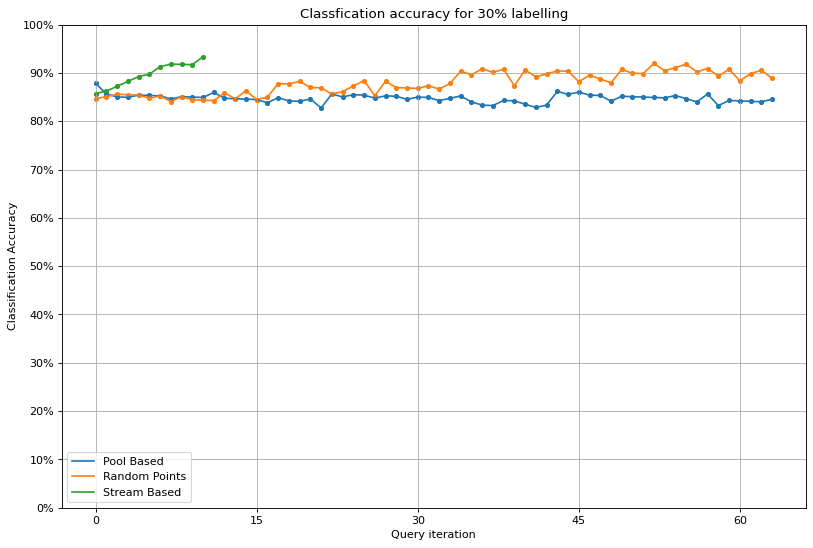

Initial prediction accuracy using margin: 0.8518518518518519
Accuracy after query 89 0.8670212765957447
Accuracy after query 11 0.8556149732620321
Accuracy after query 38 0.8548387096774194
Accuracy after query 111 0.8594594594594595
Accuracy after query 136 0.8586956521739131
Accuracy after query 160 0.8469945355191257
Accuracy after query 61 0.8461538461538461
Accuracy after query 7 0.8397790055248618
Accuracy after query 18 0.85
Accuracy after query 170 0.8603351955307262
Accuracy after query 70 0.8539325842696629
Accuracy after query 45 0.847457627118644
Accuracy after query 47 0.875
Accuracy after query 114 0.8571428571428571
Accuracy after query 16 0.8620689655172413
Accuracy after query 118 0.861271676300578
Accuracy after query 40 0.8604651162790697
Accuracy after query 106 0.8713450292397661
Accuracy after query 24 0.8764705882352941
Accuracy after query 83 0.863905325443787
Accuracy after query 60 0.8571428571428571
Accuracy after query 43 0.8682634730538922
Accuracy after qu

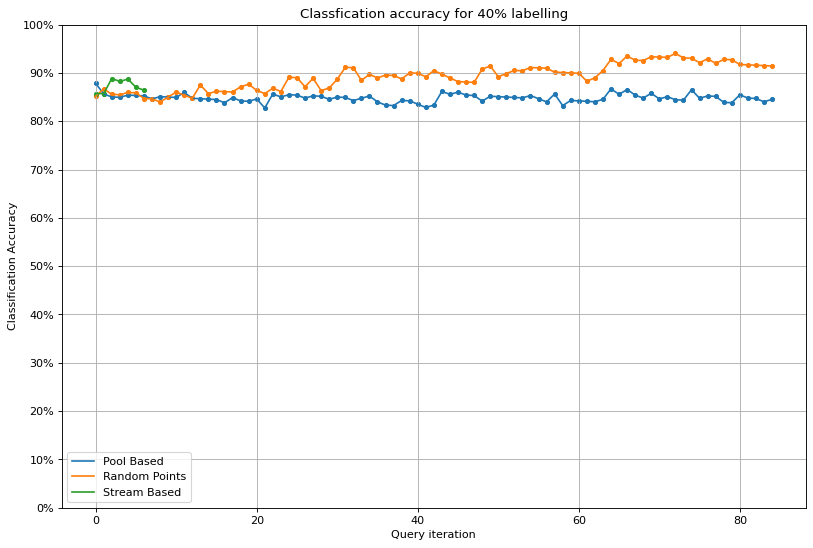

In [ ]:
def percent_labelling(j, data, data_labels, train_len, margin_performance10):
    X_unlabld, y_oracles = data[train_len:,:], data_labels[train_len:]
    X_train, y_train = data[0:train_len,:], data_labels[0:train_len]
    classifier = RandomForestClassifier()
    Random_learner = ActiveLearner(estimator=classifier, 
                                        X_training=X_train, y_training=y_train, 
                                        query_strategy = classifier_uncertainty)
    init_acc = Random_learner.score(X_unlabld, y_oracles)
    print('Initial prediction accuracy using margin:', init_acc)

    values = Random_learner.query(X_unlabld)
    # values.sort()

    Random_performance10 = [init_acc]
    dicti = {}
    for i in range(oracles_len[int((j-10)/10)]):
        random = np.random.randint(low=0, high=X_unlabld.shape[0], size=1)
        X, y = X_unlabld[random[0]].reshape(1,-1), y_oracles[random[0]].reshape(1,)
        Random_learner.teach(X=X, y=y)
        X_unlabld = np.delete(X_unlabld, random[0], axis = 0)
        y_oracles = np.delete(y_oracles, random[0])
        model_accuracy = Random_learner.score(X_unlabld, y_oracles)
        print('Accuracy after query', random[0], model_accuracy)
        Random_performance10.append(model_accuracy)

    X_unlabld, y_oracles = data[train_len:,:], data_labels[train_len:]
    X_train, y_train = data[0:train_len,:], data_labels[0:train_len]
    Stream_learner = ActiveLearner(estimator=classifier, 
                                            X_training=X_train, y_training=y_train, 
                                            query_strategy = classifier_margin)
    init_acc = Stream_learner.score(X_unlabld, y_oracles)
    Stream_performance10 = [init_acc]


    for index in range(oracles_len[int((j-10)/10)]):
        stream_idx = np.random.choice(range(len(X_unlabld)))
        if classifier_uncertainty(Stream_learner, X_unlabld[stream_idx].reshape(1, -1)) >= 0.33:
            Stream_learner.teach(X_unlabld[stream_idx].reshape(1, -1), y_oracles[stream_idx].reshape(1, ))
            stream_acc = Stream_learner.score(X_unlabld, y_oracles)
            X_unlabld = np.delete(X_unlabld, stream_idx, axis = 0)
            y_oracles = np.delete(y_oracles, stream_idx, axis = 0)
            Stream_performance10.append(stream_acc)
            print('Accuracy after stream based query on:', stream_idx, 'is', stream_acc)

    %matplotlib inline
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

    ax.plot(margin_performance10, label = "Pool Based")
    ax.plot(Random_performance10, label = "Random Points")
    ax.plot(Stream_performance10, label = "Stream Based")
    ax.scatter(range(len(margin_performance10)), margin_performance10, s=13)
    ax.scatter(range(len(Random_performance10)), Random_performance10, s=13)
    ax.scatter(range(len(Stream_performance10)), Stream_performance10, s=13)
    leg = ax.legend()
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
    ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

    ax.set_ylim(bottom=0, top=1)
    ax.grid(True)

    ax.set_title("Classfication accuracy for "+str(j)+"% labelling")
    ax.set_xlabel('Query iteration')
    ax.set_ylabel('Classification Accuracy')

    plt.savefig("rand_vs_stream_vs_pool.png")

    plt.show()

percent_labelling(10, data, data_labels, train_len, margin_performance10)
percent_labelling(20, data, data_labels, train_len, margin_performance20)
percent_labelling(30, data, data_labels, train_len, margin_performance30)
percent_labelling(40, data, data_labels, train_len, margin_performance40)

In [ ]:
def LCP(ls, oracles_len, X_unlabld, y_oracles, _learner, dicti, values):
    performance= deepcopy(ls)
    for i in range(oracles_len[0]):
        idx = np.argmax(values)
        X, y = X_unlabld[idx,:].reshape(1, -1), y_oracles[idx].reshape(1,)
        info = values[idx]
        _learner.teach(X=X, y=y)
        X_unlabld, y_oracles, values = np.delete(X_unlabld, idx, axis=0), np.delete(y_oracles, idx, axis=0), np.delete(values, idx, axis=0)
        model_accuracy = _learner.score(X_unlabld, y_oracles)
        print('Accuracy after query:',idx, 'is', model_accuracy, 'for iter:', i)
        performance.append(model_accuracy)
        dict1 = {i:info}
        dicti.update(dict1)
    sort_dict = sorted(dicti.items(), key=lambda x: x[1], reverse=True)
    import collections
    dict_1 = collections.OrderedDict(sort_dict)
    from matplotlib.pyplot import figure
    fig, ax = plt.subplots()
    ax.plot(list(dict_1.values()))
    ax.set_xlabel("Datapoints")
    ax.set_ylabel("Informativeness")
    ax.set_title("Least Confident for 10% additional labels")
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10)) 
    plt.show() 
    return performance

def qbc_Learner(X_train, y_train, X_unlabld, y_oracles, oracles_len, strategy):
    n_committe = 5;
    committee = [];
    for i in range(n_committe):
        learner = ActiveLearner(estimator=RandomForestClassifier(), X_training=X_train, y_training=y_train)
        committee.append(learner)
    committee_ = Committee(learner_list=committee,
                         query_strategy=strategy)

    unlabld_entropyScore = committee_entropy.score(X_unlabld, y_oracles)
    print('Initial prediction accuracy using vote entropy', unlabld_entropyScore)
    Performance10 = [unlabld_entropyScore]
    values = committee_.query(X_unlabld)
    dicti = {}
    performance10 = LCP(Performance10, oracles_len, X_unlabld, y_oracles, committee_, dicti, values)
    performance20 = LCP(performance10, oracles_len, X_unlabld, y_oracles, committee_, dicti, values)
    performance30 = LCP(performance20, oracles_len, X_unlabld, y_oracles, committee_, dicti, values)
    performance40 = LCP(performance30, oracles_len, X_unlabld, y_oracles, committee_, dicti, values)
    return performance10, performance20, performance30, performance40

def plotComparison(vote_entropy, KL, i):
    fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
    ax.plot(vote_entropy, label = "Vote Entropy")
    ax.plot(KL, label = "KL Max Divergence")
    ax.scatter(range(len(vote_entropy)), vote_entropy, s=13)
    ax.scatter(range(len(KL)), KL, s=13)
    leg = ax.legend()
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
    ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
    ax.set_ylim(bottom=0, top=1)
    ax.grid(True)
    ax.set_title('Classification accuracy different models [%d] additional labelling' %(i))
    ax.set_xlabel('Query iteration')
    ax.set_ylabel('Classification Accuracy')
    plt.show()

vote_entropy_performance10, vote_entropy_performance20, vote_entropy_performance30, vote_entropy_performance40 = qbc_Learner(X_train, y_train, X_unlabld, y_oracles, oracles_len, vote_entropy)
X_unlabld, y_oracles = data[train_len:,:], data_labels[train_len:]
KL_performance10, KL_performance20, KL_performance30, KL_performance40 = qbc_Learner(X_train, y_train, X_unlabld, y_oracles, oracles_len, KL_max_disagreement)
plotComparison(vote_entropy_performance10, KL_performance10, 10)
plotComparison(vote_entropy_performance20, KL_performance20, 20)
plotComparison(vote_entropy_performance30, KL_performance30, 30)
plotComparison(vote_entropy_performance40, KL_performance40, 40)

In [ ]:
n_committe = 5;
committee = [];
for i in range(n_committe):
  learner = ActiveLearner(estimator=RandomForestClassifier(), X_training=X_train, y_training=y_train)
  committee.append(learner)

committee_entropy = Committee(learner_list=committee,
                     query_strategy=vote_entropy)

unlabld_entropyScore = committee_entropy.score(X_unlabld, y_oracles)
print('Initial prediction accuracy using vote entropy', unlabld_entropyScore)

entropyPerformance10 = [unlabld_entropyScore]
values = committee_entropy.query(X_unlabld)

Initial prediction accuracy using vote entropy 0.8624338624338624


Intial Size of version space is  71


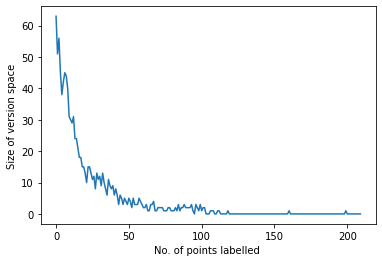

In [ ]:
def version_space(data, data_labels, train_len):
    # initializing Committee members
    n_committee = 5
    committee = []

    for i in range(n_committee):
        # initial training data
        n_init = round(len(data)*0.1)
        X_train = data[i*n_init:(i+1)*n_init, :]
        y_train = data_labels[i*n_init:(i+1)*n_init]
        # creating a reduced copy of the data with the known instances removed
        X_unlabld = data[(i+1)*n_init:, :]
        y_oracles = data_labels[(i+1)*n_init:]

        # initializing learner
        learner = ActiveLearner(
            estimator=RandomForestClassifier(),
            X_training=X_train, y_training = y_train
        )
        committee.append(learner)

    # assembling the committee
    committee_KL = Committee(learner_list=committee,
                         query_strategy=KL_max_disagreement)

    committee_entropy = Committee(learner_list=committee,
                         query_strategy=vote_entropy_sampling)

    comittee_version_space_KL = Committee(learner_list=committee,
                         query_strategy=KL_max_disagreement)
    version_space_size = []
    version_space_points = vote_entropy(comittee_version_space_KL, data)
    version_space_points = version_space_points[version_space_points!=0]
    print('Intial Size of version space is ', len(version_space_points))

    performance_history_KL_10 = [committee_KL.score(data, data_labels)]
    X_unlabld = data[:, :]
    y_oracles = data_labels[:]
    # query by committee
    for i in range(len(data)):
      # print(i)
      query_idx,_ = max_disagreement_sampling(comittee_version_space_KL, X_unlabld)
    #   query_instance = committee_KL.query(X_pool)
    #   query_idx = query_instance.argmax()
      query_idx = np.array((query_idx))
      comittee_version_space_KL.teach(
          X = X_unlabld[query_idx].reshape(1, -1),
          y = y_oracles[query_idx].reshape(1, )
      )
      performance_history_KL_10.append(comittee_version_space_KL.score(data, data_labels))
      # remove queried instance from pool
      X_unlabld = np.delete(X_unlabld, query_idx, axis = 0)
      y_oracles = np.delete(y_oracles, query_idx)
      version_space_points = vote_entropy(comittee_version_space_KL, data)
      version_space_points = version_space_points[version_space_points!=0]
      version_space_size.append(version_space_points.shape)  
    plt.plot(version_space_size)
    plt.xlabel('No. of points labelled ')
    plt.ylabel('Size of version space')
    plt.show()
        
version_space(data, data_labels, train_len)

In [ ]:
def k_means(data, data_labels, train_len):
    X_unlabld = data[train_len:,:]
    y_oracles = data_labels[train_len:]
    for_clusters = int(len(X_unlabld)*0.4)
    X_forclusters = X_unlabld[for_clusters:,:]
    y_forclusters = y_oracles[for_clusters:]
    K = 3
    kmeans = KMeans(n_clusters=K, random_state=1).fit(X_forclusters)
    labels = kmeans.labels_
    index = []
    for i in range(K):
        index.append(np.argwhere(labels==i))
    index = np.array(index)
    count = 0
    X_test = deepcopy(data[train_len:,:])
    y_test = deepcopy(data_labels[train_len:])
    cluster_class = {}
    for i in range(K):
        label_pts = round(index[i].shape[0]*0.2)
        label_idx = index[i][np.random.choice(range(index[i].shape[0]), size = label_pts, replace=False)]
        count = count + label_idx.shape[0]
        cluster_class[i] = stats.mode(y_forclusters[label_idx])[0]
        X_test = np.delete(X_test, label_idx.reshape(1,-1)[0], axis=0)
        y_test = np.delete(y_test, label_idx.reshape(1,-1)[0], axis=0)
    y_test_labels = kmeans.predict(X_test)
    error = 0
    for i in range(X_test.shape[0]):
        if cluster_class[y_test_labels[i]]!=y_test[i]:
            error = error + 1
    print('KMeans accuracy = ', 1 - error/X_test.shape[0], 'for', count, 'number of points labelled as 20% instead of all', X_forclusters.shape[0])
    
if __name__=="main":
    k_means(data, data_labels, train_len)

In [ ]:
X_unlabld = data[train_len:,:]
y_oracles = data_labels[train_len:]
for_clusters = int(len(X_unlabld)*0.4)
X_forclusters = X_unlabld[for_clusters:,:]
y_forclusters = y_oracles[for_clusters:]

In [ ]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=1).fit(X_forclusters)
labels = kmeans.labels_
index = []
for i in range(K):
    index.append(np.argwhere(labels==i))
index = np.array(index)

In [ ]:
count = 0
X_test = deepcopy(data[train_len:,:])
y_test = deepcopy(data_labels[train_len:])
cluster_class = {}
for i in range(K):
    label_pts = round(index[i].shape[0]*0.2)
    label_idx = index[i][np.random.choice(range(index[i].shape[0]), size = label_pts, replace=False)]
    count = count + label_idx.shape[0]
    cluster_class[i] = stats.mode(y_forclusters[label_idx])[0]
    X_test = np.delete(X_test, label_idx.reshape(1,-1)[0], axis=0)
    y_test = np.delete(y_test, label_idx.reshape(1,-1)[0], axis=0)
y_test_labels = kmeans.predict(X_test)

In [ ]:
label_idx.shape

(7, 1)

In [ ]:
error = 0
for i in range(X_test.shape[0]):
    
    if cluster_class[y_test_labels[i]]!=y_test[i]:
        error = error + 1

In [ ]:
print('KMeans accuracy = ', 1 - error/X_test.shape[0], 'for', count, 'number of points labelled as 20% instead of all', X_forclusters.shape[0])

KMeans accuracy =  0.9281437125748503 for 22 number of points labelled as 20% instead of all 114
